# Task 1: Load and Explore the Dataset

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [5]:
iris = load_iris()
df = pd.DataFrame(data =iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.shape

(150, 4)

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Visual Exploration

Text(0.5, 1.0, 'sepal length vs sepal width')

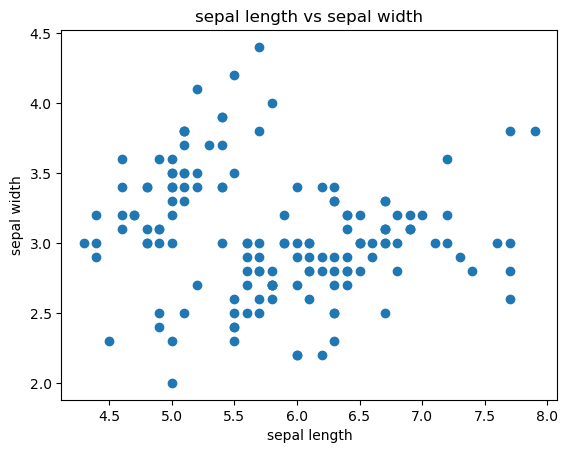

In [9]:
plt.scatter(x=df['sepal length (cm)'], y=df['sepal width (cm)'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('sepal length vs sepal width')

Text(0.5, 1.0, 'petal length vs petal width')

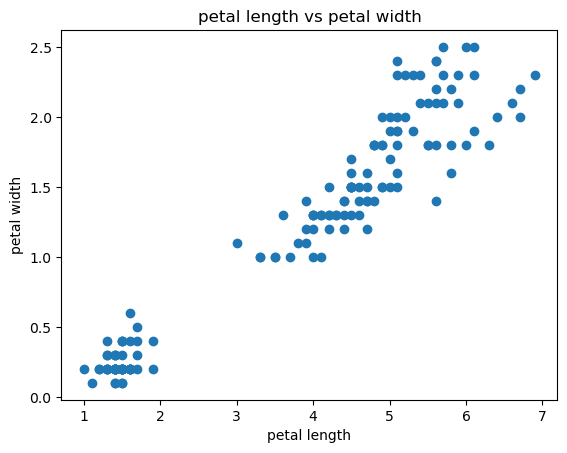

In [10]:
plt.scatter(x=df['petal length (cm)'], y=df['petal width (cm)'])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('petal length vs petal width')

## Task 3: Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [13]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Text(0, 0.5, 'sepal width')

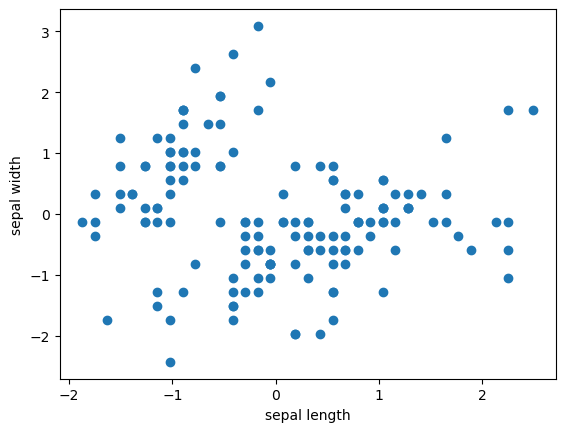

In [14]:
plt.scatter(x=df_scaled['sepal length (cm)'], y=df_scaled['sepal width (cm)'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0, 0.5, 'petal width')

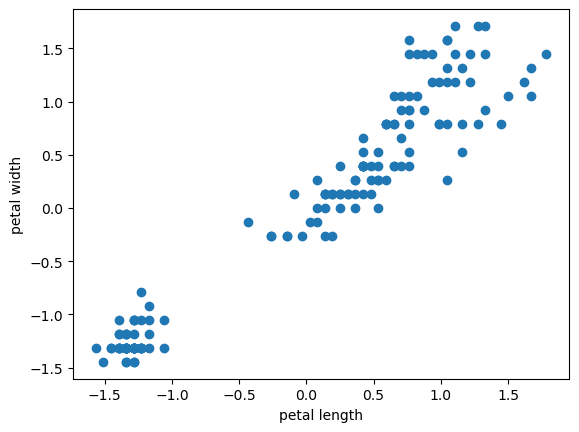

In [15]:
plt.scatter(x=df_scaled['petal length (cm)'], y=df_scaled['petal width (cm)'])
plt.xlabel('petal length')
plt.ylabel('petal width')

# Task4: Apply K-Means Clustering

In [16]:
df_scaled.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [17]:
from sklearn.cluster import KMeans

In [18]:
type(df_scaled)

pandas.core.frame.DataFrame

In [19]:
df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [20]:
df_scaled = df_scaled.drop(['sepal length (cm)','sepal width (cm)'], axis=1)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_scaled)
df_scaled['clusters']= clusters
df_scaled

,petal length (cm),petal width (cm),clusters
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0
...,...,...,...
145,0.819596,1.448832,1
146,0.705921,0.922303,1
147,0.819596,1.053935,1
148,0.933271,1.448832,1


In [21]:
df1=df_scaled[df_scaled.clusters==0]
df2=df_scaled[df_scaled.clusters==1]
df3=df_scaled[df_scaled.clusters==2]

In [22]:
df1.head()

,petal length (cm),petal width (cm),clusters
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


In [23]:
df2.head()

,petal length (cm),petal width (cm),clusters
70,0.592246,0.790671,1
77,0.705921,0.659038,1
100,1.274295,1.712096,1
101,0.762758,0.922303,1
102,1.217458,1.185567,1


# Task 5: Cluster Visualization

In [24]:
kmeans.cluster_centers_

array([[-1.30498732, -1.25489349],
       [ 1.02799959,  1.12797813],
       [ 0.3058728 ,  0.16541778]])

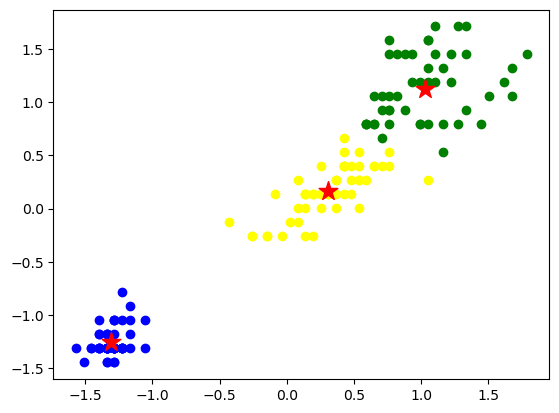

In [25]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'],color='yellow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker='*',label='centroid', color='red',s=200)


# Task 6: Choosing the Number of Clusters(Elbow Method)

In [26]:
inertia = []
k_range = range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

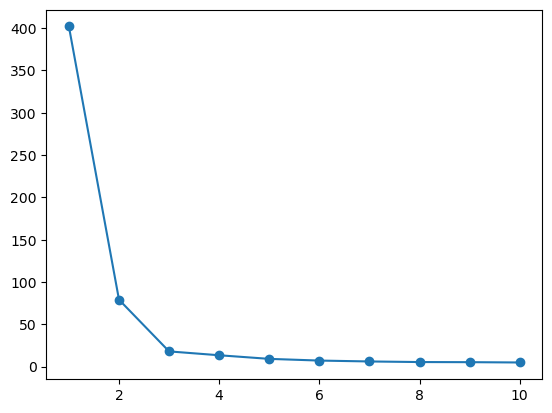

In [27]:
plt.plot(k_range, inertia,marker='o')